<a href="https://colab.research.google.com/github/MaxDangVu136/ml_carpentry_workshop_2023/blob/main/ml_carpentry_workshop_day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Load dataset from seaborn module for training:
# Anscomes Quartet consists of 4 sets of data
data = sns.load_dataset("anscombe")

In [40]:
# Inspect first few data entries
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [41]:
data['dataset']

0       I
1       I
2       I
3       I
4       I
5       I
6       I
7       I
8       I
9       I
10      I
11     II
12     II
13     II
14     II
15     II
16     II
17     II
18     II
19     II
20     II
21     II
22    III
23    III
24    III
25    III
26    III
27    III
28    III
29    III
30    III
31    III
32    III
33     IV
34     IV
35     IV
36     IV
37     IV
38     IV
39     IV
40     IV
41     IV
42     IV
43     IV
Name: dataset, dtype: object

In [42]:
data['dataset'] == 'I'

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
Name: dataset, dtype: bool

In [43]:
data_1 = data[data['dataset'] == 'I']
data_1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


Text(0, 0.5, 'y')

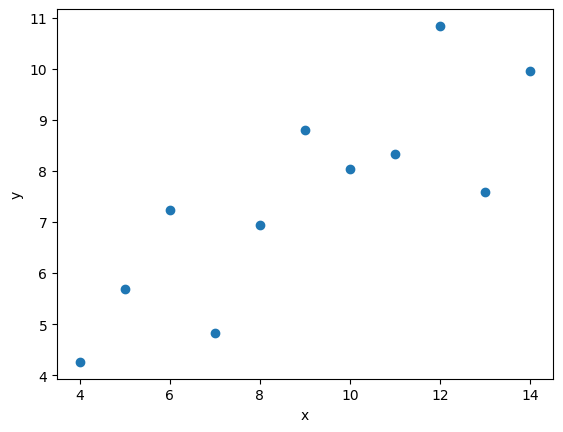

In [44]:
# Plot data1
plt.scatter(data_1['x'], data_1['y'])
plt.xlabel('x')
plt.ylabel('y')

In [45]:
# We want to fit a line of best fit to describe this data (linear model)
# Linear model: y = mx + c, where x = data_1['x'] and y = data_1['y'].
# We need to find m and c by fitting a linear regression model.

In [46]:
# To fit linear regression model, we need to convert data_1 from a dataframe to an array representation.
def linear_preprocess_data(x, y):
  """
  Converts data of any type (e.g. 1D series) to a 2D array,
  which can be used for machine learning.
  """

  x_data = np.array(x).reshape(-1, 1)
  y_data = np.array(y).reshape(-1, 1)

  return x_data, y_data

In [47]:
data_1_x, data_1_y = linear_preprocess_data(data_1['x'], data_1['y'])
data_1_x, data_1_y

(array([[10.],
        [ 8.],
        [13.],
        [ 9.],
        [11.],
        [14.],
        [ 6.],
        [ 4.],
        [12.],
        [ 7.],
        [ 5.]]),
 array([[ 8.04],
        [ 6.95],
        [ 7.58],
        [ 8.81],
        [ 8.33],
        [ 9.96],
        [ 7.24],
        [ 4.26],
        [10.84],
        [ 4.82],
        [ 5.68]]))

In [52]:
# Create a linear model which we use for training
from sklearn.linear_model import LinearRegression

def fit_linear_model(x_data, y_data):

  # Define model
  model = LinearRegression(fit_intercept=True)

  # Train model
  linear_model = model.fit(X=x_data, y=y_data)

  # Check trained parameters
  m = linear_model.coef_  # gradient
  c = linear_model.intercept_  # y-intercept

  print("m: {}, c: {}".format(m, c))

  return linear_model

In [53]:
regression_model = fit_linear_model(x_data=data_1_x, y_data=data_1_y)

m: [[0.50009091]], c: [3.00009091]


In [50]:
# Evaluate the model's predictive performance with respect to the actual data using root mean squared error
import math
from sklearn.metrics import mean_squared_error

def predict_linear_model(linear_model, x_data, y_data):

  # Make predictions
  y_pred = linear_model.predict(x_data)

  # Calculate RMSE
  error = math.sqrt(mean_squared_error(y_data, y_pred))
  print("Linear RMSE error:", error)

  return y_pred

In [59]:
pred_y = predict_linear_model(regression_model, data_1_x, data_1_y)

Linear RMSE error: 1.1185497916336298


In [64]:
# Plot prediction vs data
def plot_linear_model(x_data, y_data, y_pred):

  plt.scatter(x_data, y_data, 'g', label='input')
  plt.plot(x_data, y_pred, 'r-', label='fit')
  plt.plot(x_data, y_pred, 'rx', label='predictions')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

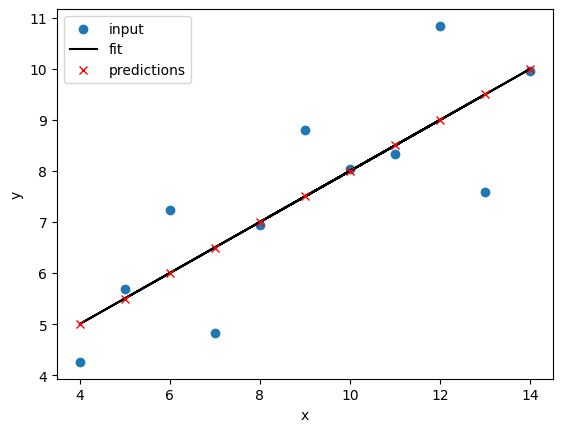

In [63]:
plot_linear_model(data_1_x, data_1_y, pred_y)